In [1]:
from resources.notebook_library import *
from resources.gate_simulation.ghz import ghz_simulation
from resources.gate_simulation.ghz import gate_simulation_functions
GateSimulation  = reload(ghz_simulation)
sim = GateSimulation.Simulation('O-x-O')

Initializing system O-x-O ...
Constructing states and excitations ...
Constructing ground and first-excited statespace ...
Constructing gs_hamiltonian ...
Constructing e1_hamiltonian ...
Constructing interactions V_plus and V_minus ...
Constructing NJ_hamiltonian ...
Inverting NJ_hamiltonian ...


Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/core/history.py", line 576, in end_session
    self.db.execute("""UPDATE sessions SET end=?, num_cmds=? WHERE
sqlite3.OperationalError: disk I/O error


Constructing eff_hamiltonian and effective lindblad operators ...

System  O-x-O  initialized in 31.4 seconds.
Preparing Analytical sub-class

Done!


# Obtain grid(s) of performance

In [2]:
# Global Parameters 
kSweep = [0.99]   #[0.995]

CSweep = [100,200,500]#[10,15]#,20,25]     #[20,25,30] [50,60,70]#
SplitSweep = [10,20,50]#[5,10,25,50]#[7,8,9,10]#[3,5,10]  #[3,5,10]
 

# Bound of optimization
## DE will be multiplied by  np.sqrt(C_val)/gamma_val
DE_min = 0.01 
DE_max = 4
tg_min = 0.8
tg_max = 1.2
rot_min = 0.9
rot_max = 1.1

#Cost function
fidelity_cap = 0.98
confidence_interval = 0.99

opt_settings_dict = {'fidelity_cap': fidelity_cap , 'confidence_interval':confidence_interval}

#Optimization
number_of_cores_to_use = 16
disp_bool = False

## Using analytical simulations

In [3]:
gamma_val = sim.parameters[sg.var('gamma')]

SplitSweep = [spl*gamma_val for spl in SplitSweep] # for gamma_val = 1 it is not necessary

AllParams = [(a,b,c) for a in kSweep for b in CSweep for c in SplitSweep] # Create a 3-d grid for hardware parameters

TotalParamElems = NumElemsInList(AllParams)


CurrentNumberOfSimulations = 1
Results = [ [{} for j in range(len(SplitSweep))] for i in range(len(CSweep))]
for  (k, C_val , max_split) in AllParams:
    print(f'Simulating {CurrentNumberOfSimulations} out of {TotalParamElems}')
    CurrentNumberOfSimulations +=1
    c_val = k/ (4-4*k)
    
    hardware_dict = {'c': c_val,'k':k , 'C':C_val ,'max_split': max_split}

    sim.Analytical.obtain_gate_performance_hardware(hardware_dict)
    bounds = [[0 , max_split] , [0,DE_max*np.sqrt(C_val)/gamma_val ] , [tg_min,tg_max]  ]
    for i in range(4): bounds.append([rot_min,rot_max]) 

    sim.Analytical.optimize_gate_performance_hardware(bounds,
    opt_settings_dict,n_cores=number_of_cores_to_use,disp_bool=disp_bool)
    
    optimized_performance_dict = sim.Analytical.optimized_performance_dict
    opt_cost_function = gate_simulation_functions.gate_performance_cost_function(optimized_performance_dict,opt_settings_dict)
    tunable_params_dict = sim.Analytical.opt_tunable_dict
    
    result = {'hardware': hardware_dict , 
            'performance': optimized_performance_dict,
            'tuning': tunable_params_dict,
            'opt_settings' : opt_settings_dict, 
            'cost': opt_cost_function}
    i = np.where(C_val == np.array(CSweep) )[0][0]
    j = np.where(max_split == np.array(SplitSweep) )[0][0]
    Results[i][j] = result

    clear_output(wait=True)

Simulating 1 out of 9


RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

In [8]:
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        pass
        #print(Results[i][j]['hardware']['C'],Results[i][j]['hardware']['max_split'],Results[i][j]['cost'])
        #print(Results[i][j]['tuning'][sg.var('r2_r')]-Results[i]['tuning'][sg.var('r4_r')])

In [16]:
costs = np.array([[Results[i][j]['cost'] for j in range(len(SplitSweep))]for i in range(len(CSweep))])
i_min, j_min = ArgMin(costs)

Results[i_min][j_min]

{'hardware': {'c': 24.74999999999998, 'k': 0.99, 'C': 200, 'max_split': 50},
 'performance': {'gate_time': 8.816960109648754,
  'p_success': 0.22099252309342107,
  'fidelity': 0.9800368368523048,
  't_conf': 811.1603300876853},
 'tuning': {De: 3.8083043545879818,
  DE: 9.383102689190679,
  tgr: 0.9572823309370687,
  r1_r: 0.991178678125674,
  r2_r: 1.0221909549643373,
  r3_r: 1.051660907043179,
  r4_r: 1.0214215805407363,
  tgs: 8.816960109648754,
  pss: 0.22099252309342107},
 'opt_settings': {'fidelity_cap': 0.98, 'confidence_interval': 0.99},
 'cost': -0.32374813370521727}

# Plot result

<>:29: DeprecationWarning: invalid escape sequence \%
<>:30: DeprecationWarning: invalid escape sequence \%
<>:44: DeprecationWarning: invalid escape sequence \L
<>:29: DeprecationWarning: invalid escape sequence \%
<>:30: DeprecationWarning: invalid escape sequence \%
<>:44: DeprecationWarning: invalid escape sequence \L
<ipython-input-9-de0fdee3cd4e>:29: DeprecationWarning: invalid escape sequence \%
  AllLabels[i][j] += '$F='+ str(np.round(fidelity*100,decimals=2))+'\%$\n'
<ipython-input-9-de0fdee3cd4e>:30: DeprecationWarning: invalid escape sequence \%
  AllLabels[i][j] += '$P_{succ}='+ str(np.round(p_success*100,decimals=2))+'\%$\n'
<ipython-input-9-de0fdee3cd4e>:44: DeprecationWarning: invalid escape sequence \L
  ax.set_title(f'Gate Performance vs Cooperativity & Detuning Split \nfor $k={kPlot} \Leftrightarrow c = {np.round(cPlot,decimals=1)}$\n'


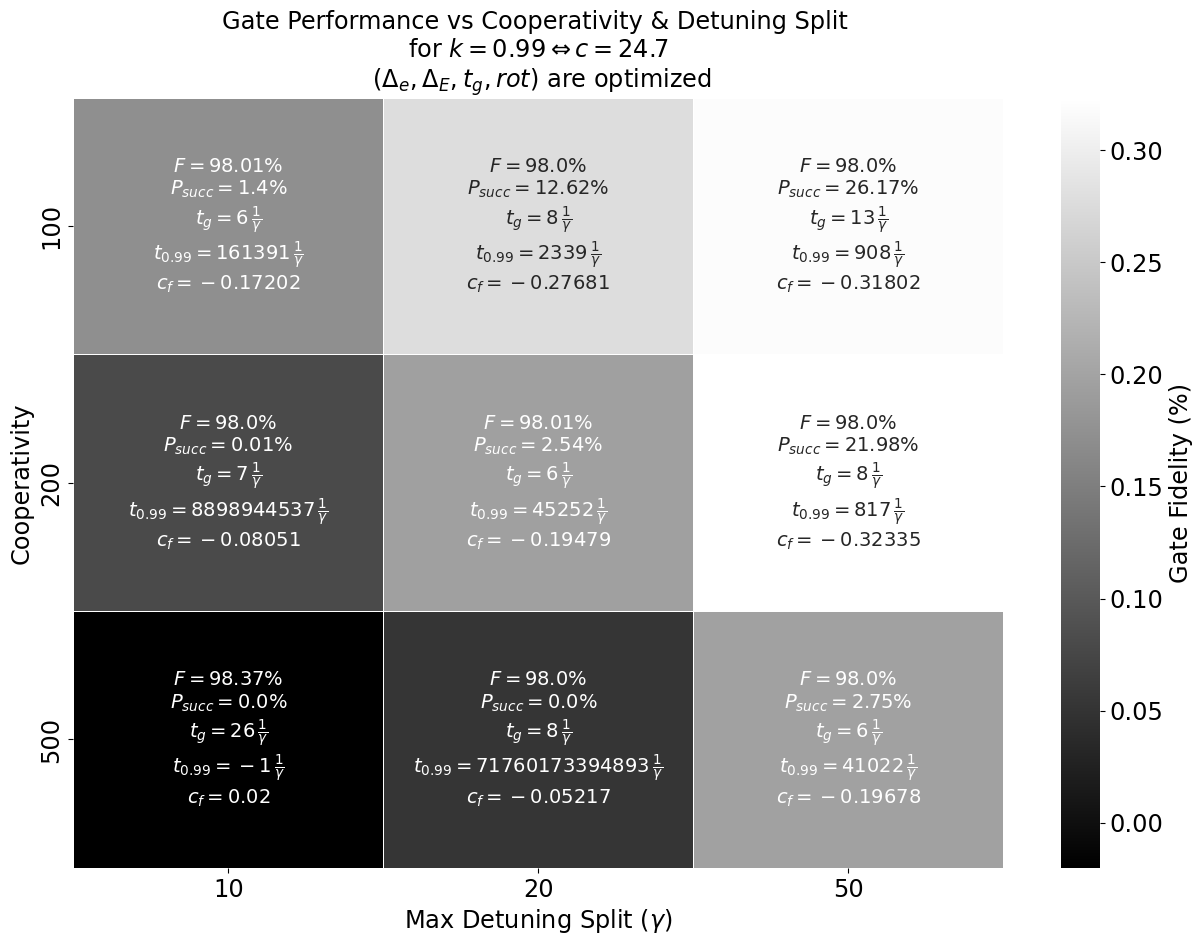

In [9]:
Analytical = True
kPlot = kSweep[0]
cPlot = kPlot / (4-4*kPlot)

fidelity_cap = 0.97
interval_of_confidence = 0.99


AllLabels = [["" for i in range(len(SplitSweep))]for j in range(len(CSweep))]
plotted_values = np.zeros(np.array(AllLabels).shape)
for (i,c) in enumerate(CSweep):
    for (j,spl) in enumerate(SplitSweep):
        
        res = Results[i][j]
        
        # Extreact parameters
        opt_tg = res['performance']['gate_time']
        opt_fid = res['performance']['fidelity']
        opt_p_success = res['performance']['p_success']
        fidelity , p_success, gate_time = opt_fid , opt_p_success , opt_tg
        t_conf = res['performance']['t_conf']
        min_cost_function = res['cost']      
        if t_conf == np.inf: t_conf = -1
            
        plotted_values[i][j] = -min_cost_function          

        AllLabels[i][j] += '$F='+ str(np.round(fidelity*100,decimals=2))+'\%$\n'
        AllLabels[i][j] += '$P_{succ}='+ str(np.round(p_success*100,decimals=2))+'\%$\n'
        AllLabels[i][j] += '$t_g='+ str(int(gate_time))+r' \,\frac{1}{\gamma}$'
        AllLabels[i][j] += '\n$t_{'+str(np.round(interval_of_confidence,decimals=2)) +'} = '+ str(int(t_conf))+r' \,\frac{1}{\gamma}$'
        AllLabels[i][j] += '\n$c_f='+ str( np.round( min_cost_function,decimals= 5))+'$'
        


fig, ax = plt.subplots()


ax = sns.heatmap(plotted_values,yticklabels=CSweep,xticklabels=SplitSweep,cmap='gray', linewidth=0.5,annot=AllLabels, fmt = ''\
    ,cbar_kws={'label': 'Gate Fidelity (%)'}, annot_kws={"size": 14}) #Greys
ax.set_ylabel('Cooperativity')
ax.set_xlabel(r'Max Detuning Split $(\gamma)$')
ax.set_title(f'Gate Performance vs Cooperativity & Detuning Split \nfor $k={kPlot} \Leftrightarrow c = {np.round(cPlot,decimals=1)}$\n'
+r' $(\Delta_e,\Delta_E,t_g,rot)$ are optimized')
plt.show() 
figure = ax.get_figure()
figure.savefig(f'plots/OptimizedHeatmap.svg',transparent=False)

In [4]:
import json

sampleDict = { "gamma": 30e6, 't_CZ':0.5e-6}
with open("resources/experimental_values.json", "w") as write_file:
    json.dump(sampleDict, write_file,indent=5)

In [20]:
from collections.abc import Mapping, Sequence
imp

class ScientificNotationEncoder(json.JSONEncoder):
    def iterencode(self, o, _one_shot=False):
        if isinstance(o, float):
            return "{:e}".format(o)
        elif isinstance(o, Mapping):
            return "{{{}}}".format(', '.join('"{}" : {}'.format(str(ok), self.iterencode(ov))
                                             for ok, ov in o.items()))
        elif isinstance(o, Sequence) and not isinstance(o, str):
            return "[{}]".format(', '.join(map(self.iterencode, o)))
        return ', '.join(super().iterencode(o, _one_shot))

In [36]:
from scipy.special import betaincinv
import numpy as np
r = 3
conf_interval  = 0.99
attempts = np.arange(0,10000)
p = betaincinv(r,attempts+1-r,conf_interval)

a = p[9]
print(a)

from numpy.random import geometric
trials = 10**7

attempts = np.zeros(trials,dtype=int)
for i in range(r):
    attempts = attempts+ geometric(a,trials) 

max_size = 10**5
res = np.zeros(max_size)
for att in attempts:
    res[att]+=1

res = np.trim_zeros(res,'b')

res = res/np.sum(res)
res_cum = np.cumsum(res)

print(np.where(res_cum>=0.99)[0][0])


0.6563145343961878
10


In [38]:
for i in range(1000000):
    np.searchsorted(-p,-0.003)

In [39]:
for i in range(1000000):
    np.argmax(p<0.003)

In [9]:
p[0:10]

array([       nan,        nan,        nan, 0.99665549, 0.95800136,
       0.89436016, 0.82693005, 0.76367644, 0.70676953, 0.65631453])

NameError: name 'np' is not defined

In [11]:
p[0:10]<0.80

array([False, False, False, False, False, False, False,  True,  True,
        True])